# Introduction

## This project involves analyzing a data set belonging to a mobile accessories franchise that operates across multiple locations in the USA. The data is stored as monthly .csv files and includes details about the ordered product, order date, and price. To analyze the data, I will preprocess and clean it using the Pandas library, perform queries using SQL to showcase different aspects, and finally visualize our findings using the Matplotlib library.

## Importing necessary libraries.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import sqlite3

## importing data files for all months seperately and merging all files into one in addition to dropping rows that have all values NaN. 

In [2]:
## importing data + merging all files into one + dropping rows that have all values NaN    
# files = [file for file in os.listdir("./Sales_Data")]
data = pd.DataFrame()
files = glob.glob("./Sales_Data/*.csv")
for file in files: 
    df = pd.read_csv(file)
    data = pd.concat([data,df])
data = data.dropna(how = "all")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## For some reason, columns names are duplicated in multiple rows in the data, example of such rows is shown in the following cell. 

In [3]:
# data["Month"] = pd.to_numeric(data["Order Date"].str[0:2])
# error : Unable to parse string "Or" at position 517. For some reason, columns names are duplicated in multiple rows in the data.
unclean_data = data[data["Order Date"].str[0:2] == "Or"]
unclean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Excluding the rows with duplicated column names, in addition to creating new columns for order month, day and year that are extracted from Order Date column.

In [4]:
# In the next line, I exclude these rows where columns names are duplicated. 
data = data[data["Order Date"].str[0:2] != "Or"]
# After the data has been cleaned, now we can have Month, day and year columns with values that are numeric
data["Month"] = pd.to_numeric(data["Order Date"].str[0:2])
data["Day"] = pd.to_numeric(data["Order Date"].str[3:5])
data["Year"] = pd.to_numeric("20" + data["Order Date"].str[6:8])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,2019
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,2019
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,2019
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,2019
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,2019


## Converting values in "Price Each" and "Quantity Ordered" columns into numeric values using pandas.to_numeric() expression. In addition to creating Sales column.

In [5]:
# Adding a column for Sales = Price Each * Quantity Ordered
data["Price Each"] = pd.to_numeric(data["Price Each"])
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Sales"] = data["Price Each"] * data["Quantity Ordered"]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,2019,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,2019,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,2019,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,2019,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,2019,11.99


## Extracting Street, City and State columns from Purchase Address column.

In [6]:
# Extracting Street, City and State columns from Purchase Address column
data["Street"] = data["Purchase Address"].apply(lambda x: x.split(",")[0])
data["City"] = data["Purchase Address"].apply(lambda x: x.split(",")[1] +" "+  "(" + x.split(",")[2].split(" ")[1] + ")")
# data["State"] = data["Purchase Address"].apply(lambda x: "(" + x.split(",")[2].split(" ")[1] + ")")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,Street,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,2019,23.90,917 1st St,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,2019,99.99,682 Chestnut St,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,2019,600.00,669 Spruce St,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,2019,11.99,669 Spruce St,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,2019,11.99,333 8th St,Los Angeles (CA)


## Creating Hour and Minute columns for time intellegence analysis later on.

In [7]:
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour
data['Minute'] = pd.to_datetime(data['Order Date']).dt.minute

## Exporting the data set into a table called "sales" in a database called "sales_database" in order to perform queries using SQL. 

In [8]:
sales_database = sqlite3.connect("sales_database.db")

In [9]:
data.to_sql("sales",sales_database)

C:\Users\Jehad\anaconda3\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [10]:
%load_ext sql

In [11]:
%sql sqlite:///sales_database.db

## First, I would like to know which cities had the highest and lowest sum of sales. In the following, I accquire such knowledge using Select, group by and order by statements in SQL. The sum of sales is listed for each city in a descendant order.  


In [12]:
%%sql 

select sum(Sales), City from sales 
group by City
order by sum(Sales) desc

 * sqlite:///sales_database.db
Done.


sum(Sales),City
8262203.910004012,San Francisco (CA)
5452570.80000207,Los Angeles (CA)
4664317.430001556,New York City (NY)
3661642.010000925,Boston (MA)
2795498.5800003405,Atlanta (GA)
2767975.40000032,Dallas (TX)
2747755.4800003143,Seattle (WA)
1870732.3399999149,Portland (OR)
1819581.7499999092,Austin (TX)
449758.2699999996,Portland (ME)


## Plotting the sum of sales across different cities. 

Text(0.5, 1.0, 'Sales per City')

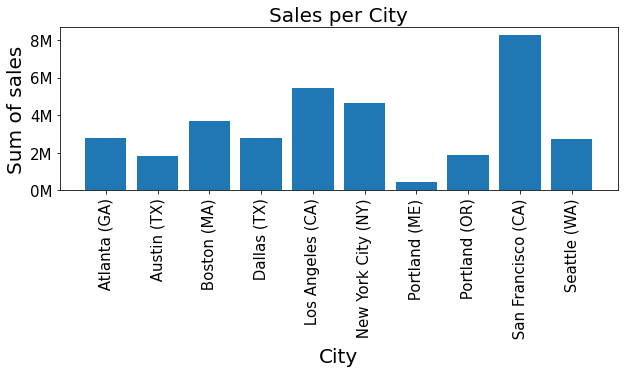

In [13]:
g_city = data.groupby(["City"]).sum()
plt.figure(figsize = (10,3))
cities = [city for city, df in data.groupby(["City"])]
plt.bar(cities, g_city["Sales"])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Sum of sales", fontsize = 20)
plt.xlabel("City", fontsize = 20)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p:format(str(int(x/1000000))+"M")))
plt.title("Sales per City", fontsize = 20)

## Exploring the sum of sales throughout the year using select, group by and order by statements in SQL.  

In [14]:
%%sql
select sum(Sales),Month from sales
Group by Month
order by sum(Sales) desc

 * sqlite:///sales_database.db
Done.


sum(Sales),Month
4613443.340001534,12
3736726.8800009703,10
3390670.240000704,4
3199603.200000589,11
3152606.750000553,5
2807100.3800003603,3
2647775.7600002377,7
2577802.260000178,6
2244467.8799999943,8
2202022.4199999636,2


## Plotting the sum of sales as a function of the time of the year. 

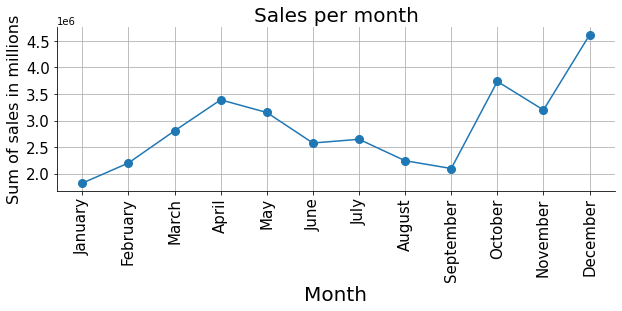

In [15]:
g_month = data.groupby(["Month"]).sum()
g_month
plt.figure(figsize=(10,3))
plt.plot(g_month["Sales"], marker = "o", markersize = 8)
plt.xticks(fontsize = 15)
plt.ylabel("Sum of sales in millions", fontsize = 16)
plt.xlabel("Month", fontsize = 20)
months_text = ["January","February","March","April","May","June","July","August","September","October","November","December"]
months_num = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(months_num,months_text,fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title("Sales per month", fontsize = 20)
ax = plt.gca()
plt.grid()
# ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p:format(str(int(x/100000)) + "M")))
sns.despine()

## I repeat the same query I used to calculate the total sales across various cities and throughout the year, but this time to determine the total sales made during each day.

In [16]:
%%sql 
select sum(Sales), Hour from sales
group by Hour
order by sum(Sales) desc

 * sqlite:///sales_database.db
Done.


sum(Sales),Hour
2412938.5400000936,19
2316821.3400000557,12
2300610.2400000147,11
2281716.240000029,20
2219348.2999999807,18
2155389.7999999365,13
2129361.6099999226,17
2083672.7299999031,14
2042000.8599999032,21
1944286.7699998997,10


## Plotting the sum of sales and the number of orders during each day. 

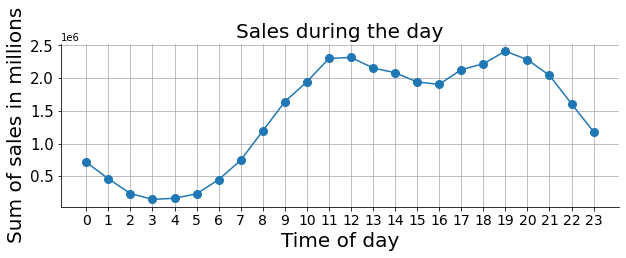

In [23]:
g_hour = data.groupby(["Hour"]).sum()
plt.figure(figsize = (10,3))
plt.plot(g_hour["Sales"], marker = "o", markersize = 8)
plt.xlabel("Time of day",fontsize = 20)
plt.ylabel("Sum of sales in millions",fontsize = 20)
plt.xticks(np.arange(0,24,1),fontsize = 14)
plt.yticks(fontsize = 15)
plt.title("Sales during the day", fontsize = 20)
ax = plt.gca()
plt.grid()
sns.despine()
data.to_csv("./Output/data-out.csv", index=False)

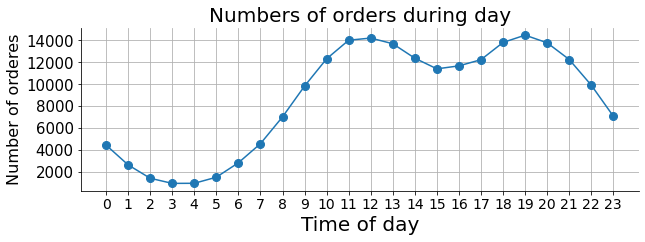

In [18]:
plt.show()
plt.figure(figsize = (10,3))
plt.plot(g_hour["Quantity Ordered"], marker = "o", markersize = 8)
plt.xticks(np.arange(0,24,1),fontsize = 14)
plt.yticks(fontsize = 15)
plt.ylabel("Number of orderes",fontsize = 16)
plt.xlabel("Time of day",fontsize = 20)
plt.title("Numbers of orders during day", fontsize = 20)
plt.grid()
sns.despine()

## Plotting the number of orders of each product. 

Text(0, 0.5, 'Quantity Ordered')

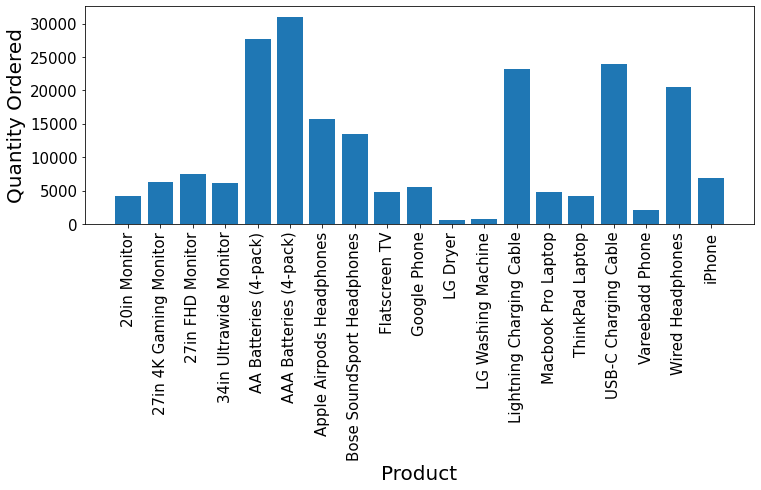

In [19]:
g_product = data.groupby(["Product"]).sum()
products = [product for product, df in data.groupby("Product")]
grouped_product = g_product.sum()["Quantity Ordered"]
plt.figure(figsize = (12,4))
plt.bar(products,g_product["Quantity Ordered"])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Product",fontsize = 20)
plt.ylabel("Quantity Ordered",fontsize = 20)

## Plotting number of orders and price of each product in one figure.

C:\Users\Jehad\AppData\Local\Temp/ipykernel_21336/1256229303.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,  rotation = 90,fontsize = 12)


Text(0, 0.5, 'Prices [$]')

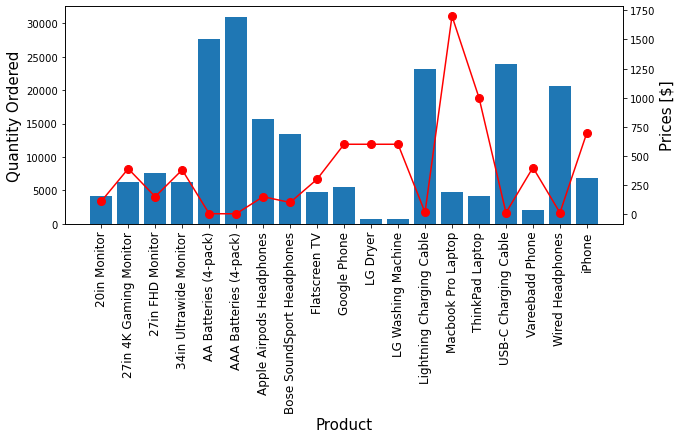

In [20]:
product_prices = data.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 4)
ax2 = ax1.twinx()
ax1.bar(products,g_product["Quantity Ordered"])
ax2.plot(products,product_prices, "-r", marker = "o", markersize = 8)
ax1.set_ylabel("Quantity Ordered", fontsize = 15)
ax1.set_xlabel("Product" , fontsize = 15)
# ax2.set_yticklabels( fontsize = 10)
ax1.set_xticklabels(products,  rotation = 90,fontsize = 12)
ax2.set_ylabel("Prices [$]", fontsize = 15)

# Conclusion:

## Based on the analysis, it is evident that San Francisco, CA has the highest sales volume, while Portland, ME has the lowest. Additionally, sales appear to increase in December. Furthermore, the analysis suggests that orders peak at approximately 7:00 pm. Finally, the data indicates that there is high demand for products with medium to low prices.